In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training and test data
data = '/Users/jackwallace/Desktop/Australia/Machine_Learning/finalproject.csv'

# Load the datasets assuming they are space delimited
df = pd.read_csv(data)


# Data Cleaning

In [2]:
df.head()

,Species,Population,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,Sex,Thorax_length,l2,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading
0,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,female,1.238,2.017,0.659,1.711,2.370,2.370,1.032,1.441,1.192,1.914
1,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,male,1.113,1.811,0.609,1.539,2.148,2.146,0.938,1.299,1.066,1.928
2,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,female,1.215,1.985,0.648,1.671,2.319,2.319,0.991,1.396,1.142,1.908
3,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,male,1.123,1.713,0.596,1.495,2.091,2.088,0.958,1.286,1.062,1.860
4,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,2,1,female,1.218,1.938,0.641,1.658,2.298,2.298,1.010,1.418,1.148,1.886


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        1731 non-null   object 
 1   Population     1731 non-null   object 
 2   Latitude       1731 non-null   float64
 3   Longitude      1731 non-null   float64
 4   Year_start     1731 non-null   int64  
 5   Year_end       1731 non-null   int64  
 6   Temperature    1731 non-null   int64  
 7   Vial           1731 non-null   int64  
 8   Replicate      1731 non-null   int64  
 9   Sex            1731 non-null   object 
 10  Thorax_length  1731 non-null   object 
 11  l2             1731 non-null   float64
 12  l3p            1731 non-null   float64
 13  l3d            1731 non-null   float64
 14  lpd            1731 non-null   float64
 15  l3             1731 non-null   float64
 16  w1             1731 non-null   float64
 17  w2             1731 non-null   float64
 18  w3      

In [4]:
# Convert 'Thorax_length' to numeric, coercing errors to NaN (missing values)
df['Thorax_length'] = pd.to_numeric(df['Thorax_length'], errors='coerce')

df['wing_loading'] = pd.to_numeric(df['wing_loading'], errors='coerce')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        1731 non-null   object 
 1   Population     1731 non-null   object 
 2   Latitude       1731 non-null   float64
 3   Longitude      1731 non-null   float64
 4   Year_start     1731 non-null   int64  
 5   Year_end       1731 non-null   int64  
 6   Temperature    1731 non-null   int64  
 7   Vial           1731 non-null   int64  
 8   Replicate      1731 non-null   int64  
 9   Sex            1731 non-null   object 
 10  Thorax_length  1730 non-null   float64
 11  l2             1731 non-null   float64
 12  l3p            1731 non-null   float64
 13  l3d            1731 non-null   float64
 14  lpd            1731 non-null   float64
 15  l3             1731 non-null   float64
 16  w1             1731 non-null   float64
 17  w2             1731 non-null   float64
 18  w3      

In [6]:
# Drop rows with missing values in 'Thorax_length' or 'wing_loading'
df.dropna(subset=['Thorax_length', 'wing_loading'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1730 entries, 0 to 1730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        1730 non-null   object 
 1   Population     1730 non-null   object 
 2   Latitude       1730 non-null   float64
 3   Longitude      1730 non-null   float64
 4   Year_start     1730 non-null   int64  
 5   Year_end       1730 non-null   int64  
 6   Temperature    1730 non-null   int64  
 7   Vial           1730 non-null   int64  
 8   Replicate      1730 non-null   int64  
 9   Sex            1730 non-null   object 
 10  Thorax_length  1730 non-null   float64
 11  l2             1730 non-null   float64
 12  l3p            1730 non-null   float64
 13  l3d            1730 non-null   float64
 14  lpd            1730 non-null   float64
 15  l3             1730 non-null   float64
 16  w1             1730 non-null   float64
 17  w2             1730 non-null   float64
 18  w3           

# One-Hot Encoding

In [7]:
# Convert 'Sex' column to binary after stripping any whitespace and converting to lower case
df['Sex'] = df['Sex'].str.strip().str.lower().map({'female': 0, 'male': 1})

In [8]:
df.head()

,Species,Population,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,Sex,Thorax_length,l2,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading
0,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,0,1.238,2.017,0.659,1.711,2.370,2.370,1.032,1.441,1.192,1.914
1,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,1,1.113,1.811,0.609,1.539,2.148,2.146,0.938,1.299,1.066,1.928
2,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,0,1.215,1.985,0.648,1.671,2.319,2.319,0.991,1.396,1.142,1.908
3,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,1,1.123,1.713,0.596,1.495,2.091,2.088,0.958,1.286,1.062,1.860
4,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,2,1,0,1.218,1.938,0.641,1.658,2.298,2.298,1.010,1.418,1.148,1.886


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1730 entries, 0 to 1730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        1730 non-null   object 
 1   Population     1730 non-null   object 
 2   Latitude       1730 non-null   float64
 3   Longitude      1730 non-null   float64
 4   Year_start     1730 non-null   int64  
 5   Year_end       1730 non-null   int64  
 6   Temperature    1730 non-null   int64  
 7   Vial           1730 non-null   int64  
 8   Replicate      1730 non-null   int64  
 9   Sex            1730 non-null   int64  
 10  Thorax_length  1730 non-null   float64
 11  l2             1730 non-null   float64
 12  l3p            1730 non-null   float64
 13  l3d            1730 non-null   float64
 14  lpd            1730 non-null   float64
 15  l3             1730 non-null   float64
 16  w1             1730 non-null   float64
 17  w2             1730 non-null   float64
 18  w3           

In [10]:
df['Sex'].value_counts()

Sex
1    872
0    858
Name: count, dtype: int64

In [11]:
df['Population'].unique()

array(['Binjour', 'Gogango_Creek', 'Grandchester', 'Oxford_Downs',
       'Wahruna'], dtype=object)

In [12]:
# Convert 'Sex' column to binary after stripping any whitespace and converting to lower case
df['Population'] = df['Population'].map({'Binjour': 0, 'Gogango_Creek': 1, 'Grandchester': 2, 'Oxford_Downs': 3, 'Wahruna': 4})
df['Population'].unique()

array([0, 1, 2, 3, 4])

In [13]:
# Convert 'Sex' column to binary after stripping any whitespace and converting to lower case
#Other way wouldn't work
df['Species'] = df['Species'].apply(lambda x: 0 if x == 'D._aldrichi' else (1 if x == 'D._buzzatii' else x))

df.head(20)
#Convert Species using one hot encoding 


,Species,Population,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,Sex,Thorax_length,l2,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading
0,0,0,-25.52,151.45,1994,1994,20,1,1,0,1.238,2.017,0.659,1.711,2.370,2.370,1.032,1.441,1.192,1.914
1,0,0,-25.52,151.45,1994,1994,20,1,1,1,1.113,1.811,0.609,1.539,2.148,2.146,0.938,1.299,1.066,1.928
2,0,0,-25.52,151.45,1994,1994,20,1,2,0,1.215,1.985,0.648,1.671,2.319,2.319,0.991,1.396,1.142,1.908
3,0,0,-25.52,151.45,1994,1994,20,1,2,1,1.123,1.713,0.596,1.495,2.091,2.088,0.958,1.286,1.062,1.860
4,0,0,-25.52,151.45,1994,1994,20,2,1,0,1.218,1.938,0.641,1.658,2.298,2.298,1.010,1.418,1.148,1.886
5,0,0,-25.52,151.45,1994,1994,20,2,1,1,1.104,1.794,0.585,1.525,2.110,2.107,0.919,1.285,1.046,1.909
6,0,0,-25.52,151.45,1994,1994,20,2,2,1,1.127,1.833,0.596,1.558,2.154,2.152,0.952,1.311,1.089,1.909
7,0,0,-25.52,151.45,1994,1994,20,2,3,1,1.102,1.774,0.568,1.492,2.059,2.058,0.923,1.277,1.065,1.867
8,0,0,-25.52,151.45,1994,1994,20,3,1,0,1.214,2.002,0.657,1.689,2.346,2.345,1.002,1.421,1.146,1.932
9,0,0,-25.52,151.45,1994,1994,20,3,1,1,1.115,1.773,0.601,1.504,2.105,2.105,0.919,1.271,1.048,1.888


# Data Exploration

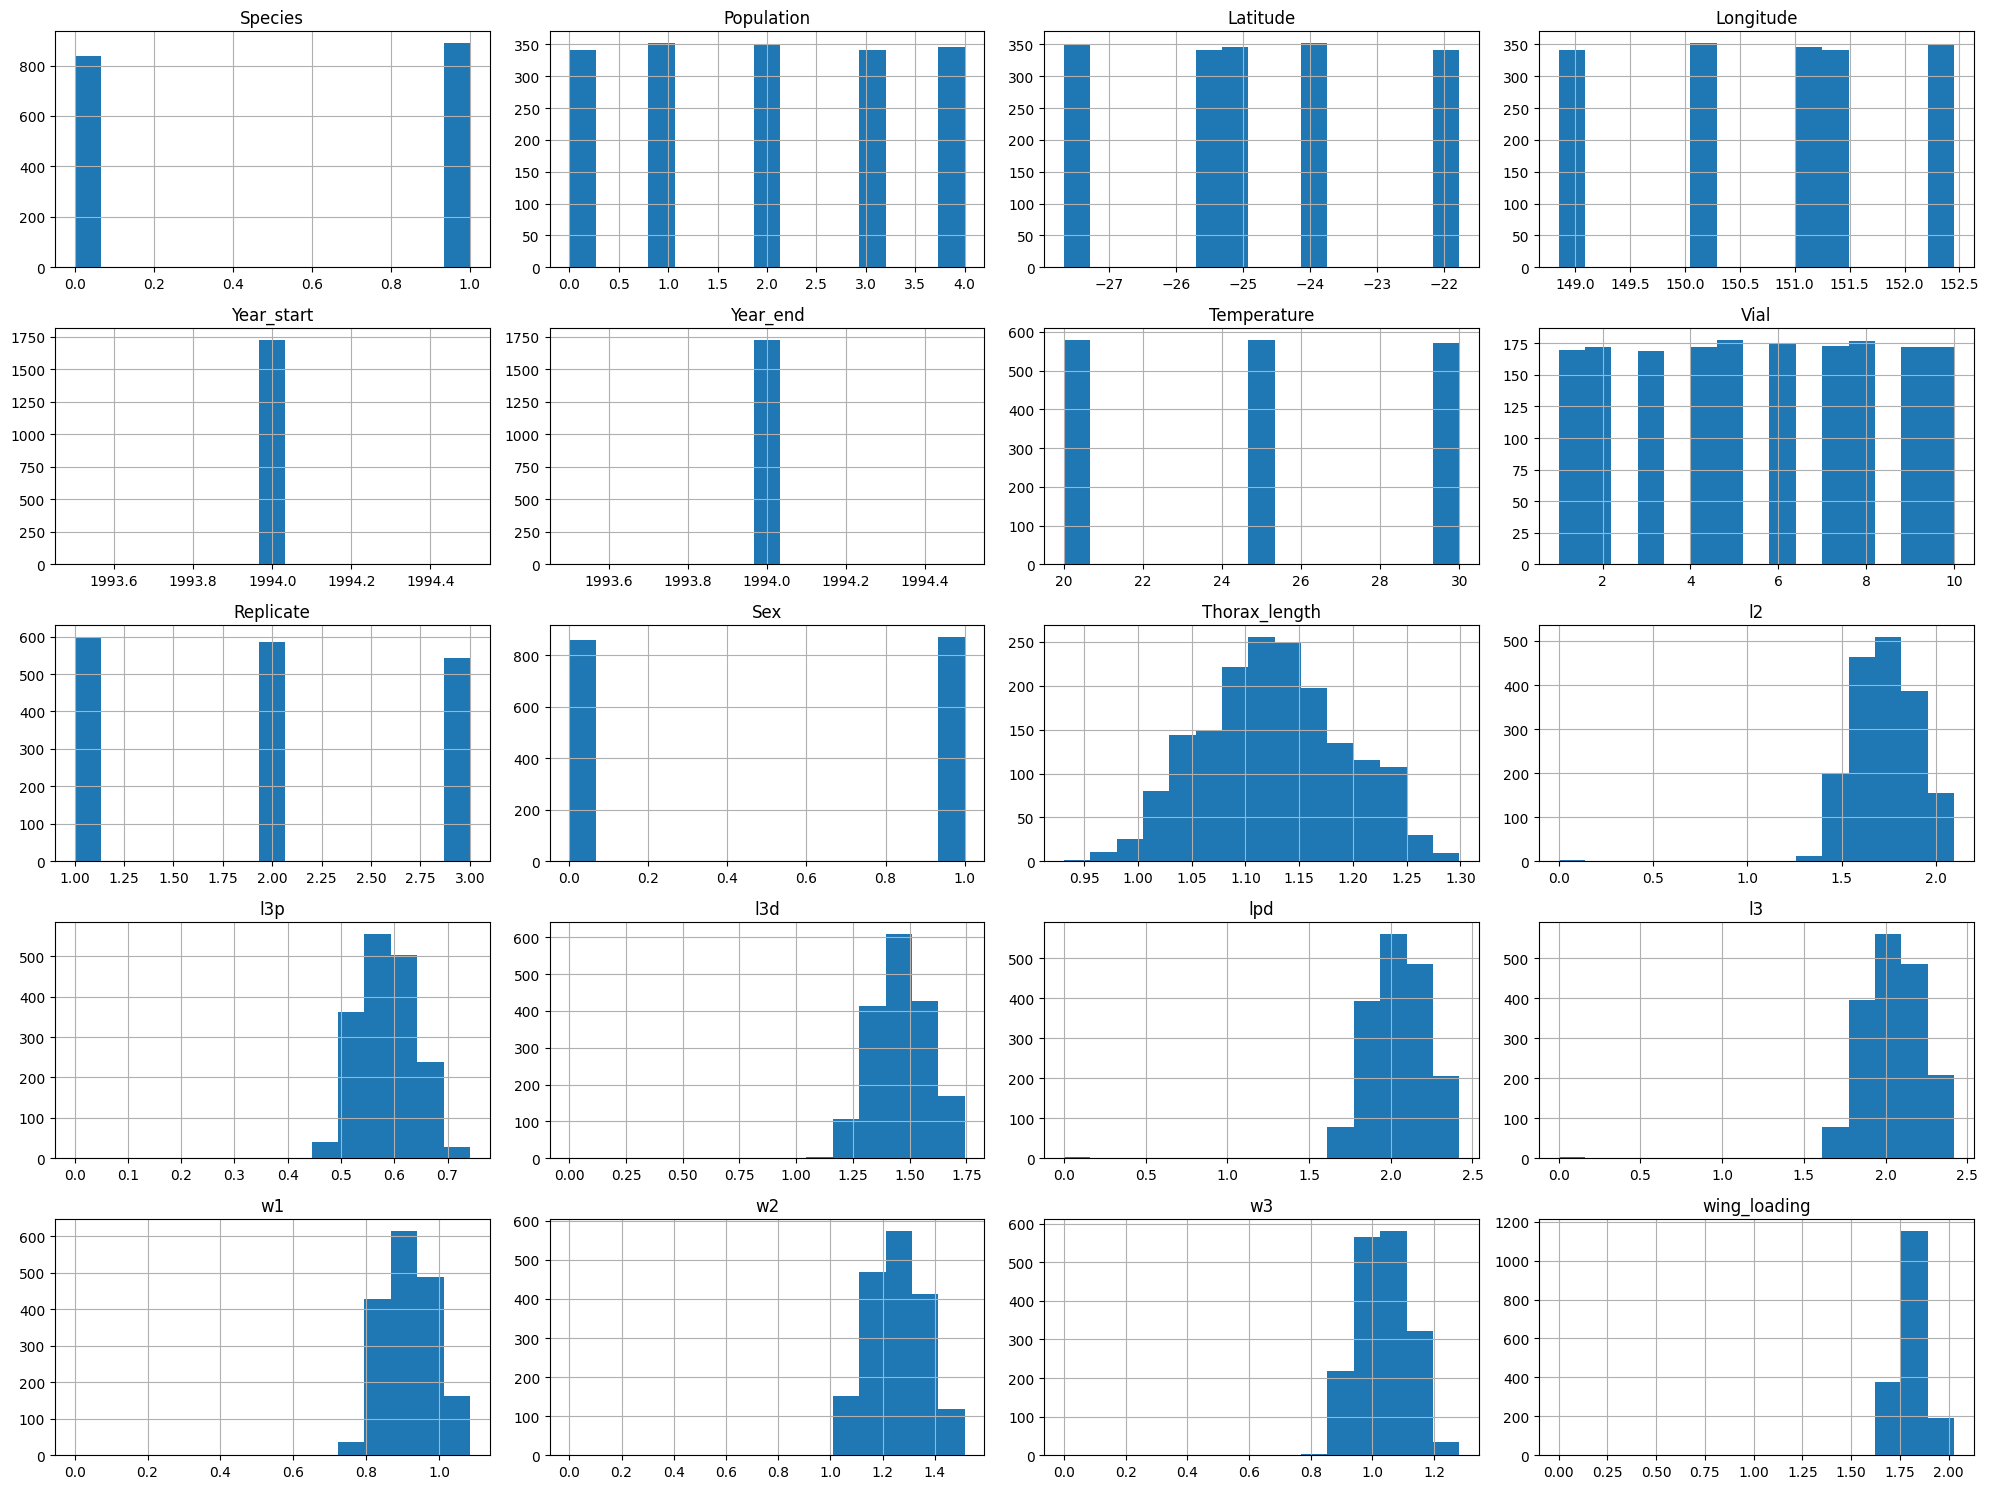

In [14]:
# Data Analysis and Exploration Techniques
# Histograms or boxplots
n_rows = 5
n_cols = 4
df.hist(bins=15, figsize=(20, 15), layout=(n_rows, n_cols))
plt.tight_layout()  # Adjust the spacing between plots
plt.show()

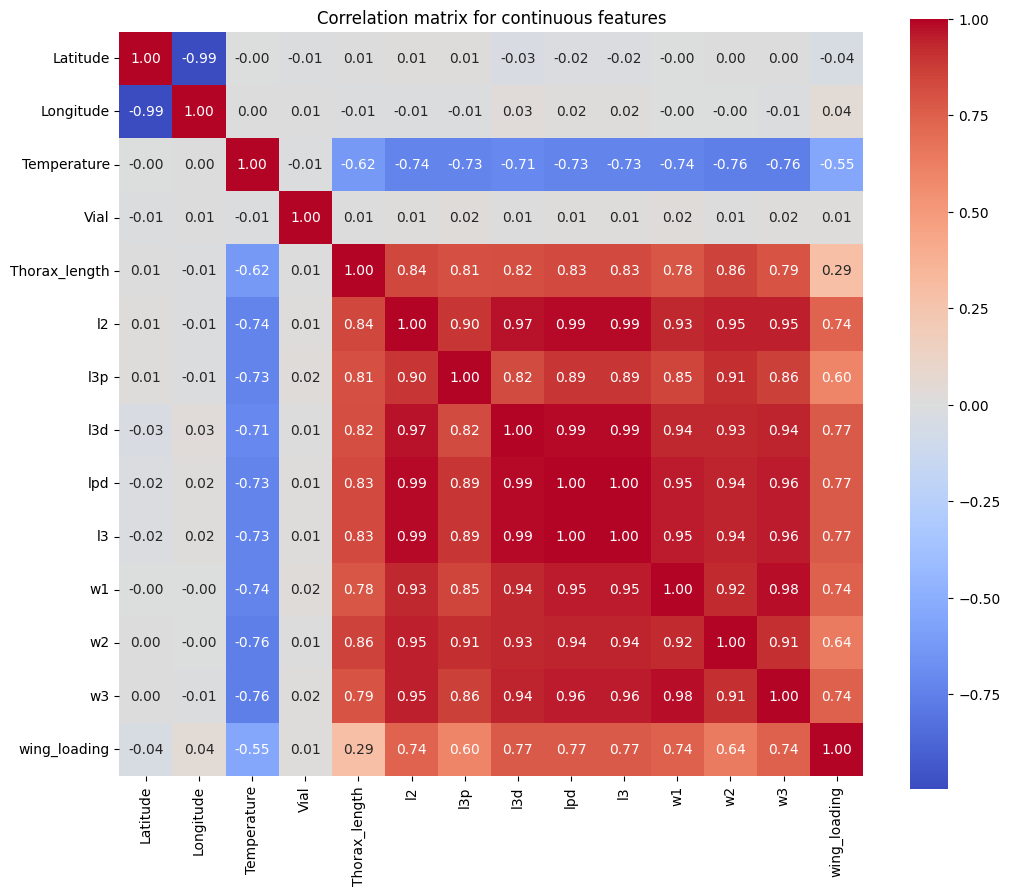

In [15]:
# List of continuous feature columns to include in the correlation matrix
continuous_features = [
    'Latitude', 'Longitude', 'Temperature', 'Vial', 'Thorax_length',
    'l2', 'l3p', 'l3d', 'lpd', 'l3', 'w1', 'w2', 'w3', 'wing_loading'
]

# Calculate correlation matrix for continuous features
correlation_matrix = df[continuous_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix for continuous features')
plt.show()

# PCA

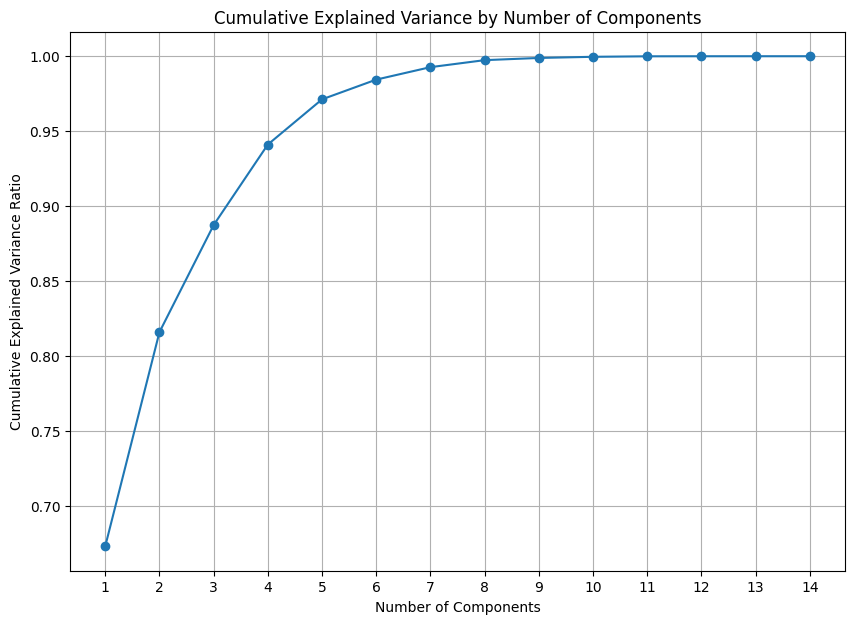

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Load libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[continuous_features])

# Apply PCA
pca = PCA(n_components=len(continuous_features))
pca.fit(scaled_features)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[continuous_features])

# Apply PCA with da  5 components
pca = PCA(n_components=5)  # Use 5 components
pca_features_optimal = pca.fit_transform(scaled_features)

# Split the PCA dataset
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(
    pca_features_optimal, df['Sex'], test_size=0.3, random_state=42)

# Split the non-PCA dataset
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, df['Sex'], test_size=0.3, random_state=42)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train on non-PCA data
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate the model on non-PCA data
print("Non-PCA Data Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Train on PCA data
log_reg.fit(X_PCA_train, y_PCA_train)
y_PCA_pred = log_reg.predict(X_PCA_test)

# Evaluate the model on PCA data
print("PCA Data Evaluation:")
print(classification_report(y_PCA_test, y_PCA_pred))
print("Accuracy:", accuracy_score(y_PCA_test, y_PCA_pred))

Non-PCA Data Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       262
           1       0.94      0.94      0.94       257

    accuracy                           0.94       519
   macro avg       0.94      0.94      0.94       519
weighted avg       0.94      0.94      0.94       519

Accuracy: 0.9402697495183044
PCA Data Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       262
           1       0.91      0.94      0.92       257

    accuracy                           0.92       519
   macro avg       0.92      0.92      0.92       519
weighted avg       0.92      0.92      0.92       519

Accuracy: 0.9229287090558767


In [19]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
import numpy as np

# Prepare the logistic regression model
model = LogisticRegression(solver='liblinear')  # Using 'liblinear' as it handles binary classification well

# Setup for 10-fold cross-validation, took a while with syntax
cv_config = {
    'cv': 10,  # Number of folds
    'return_train_score': True,  # To capture training scores
    'scoring': ['accuracy', 'neg_log_loss']  # To capture accuracy and log loss (negated in sklearn)
}

# Cross-validate on PCA data
results_pca = cross_validate(model, X_PCA_train, y_PCA_train, **cv_config)

# Cross-validate on non-PCA data
results_non_pca = cross_validate(model, X_train, y_train, **cv_config)

# Print out results
print("PCA Data - Train Accuracy:", np.mean(results_pca['train_accuracy']))
print("PCA Data - Test Accuracy:", np.mean(results_pca['test_accuracy']))
print("PCA Data - Train Log Loss:", -np.mean(results_pca['train_neg_log_loss']))  # negating to get positive log loss
print("PCA Data - Test Log Loss:", -np.mean(results_pca['test_neg_log_loss']))  # negating to get positive log loss

print("Non-PCA Data - Train Accuracy:", np.mean(results_non_pca['train_accuracy']))
print("Non-PCA Data - Test Accuracy:", np.mean(results_non_pca['test_accuracy']))
print("Non-PCA Data - Train Log Loss:", -np.mean(results_non_pca['train_neg_log_loss']))  # negating to get positive log loss
print("Non-PCA Data - Test Log Loss:", -np.mean(results_non_pca['test_neg_log_loss']))  # negating to get positive log loss


PCA Data - Train Accuracy: 0.9306356307023529
PCA Data - Test Accuracy: 0.9289662647337759
PCA Data - Train Log Loss: 0.20174159125257707
PCA Data - Test Log Loss: 0.21663523043493838
Non-PCA Data - Train Accuracy: 0.9371499818872628
Non-PCA Data - Test Accuracy: 0.9314523777265954
Non-PCA Data - Train Log Loss: 0.1829241231785778
Non-PCA Data - Test Log Loss: 0.20840454310013964


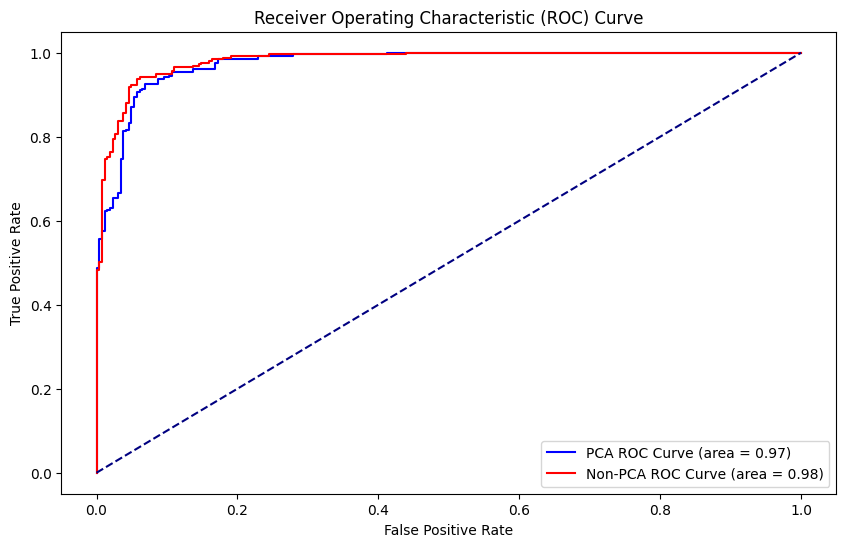

In [20]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# For PCA data
log_reg_PCA = LogisticRegression()
log_reg_PCA.fit(X_PCA_train, y_PCA_train)
y_PCA_scores = log_reg_PCA.predict_proba(X_PCA_test)[:, 1]  # Probabilities for the positive class

# For non-PCA data
log_reg_nonPCA = LogisticRegression()
log_reg_nonPCA.fit(X_train, y_train)
y_nonPCA_scores = log_reg_nonPCA.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC for PCA
fpr_PCA, tpr_PCA, _ = roc_curve(y_PCA_test, y_PCA_scores)
auc_PCA = auc(fpr_PCA, tpr_PCA)

# Calculate ROC curve and AUC for non-PCA
fpr_nonPCA, tpr_nonPCA, _ = roc_curve(y_test, y_nonPCA_scores)
auc_nonPCA = auc(fpr_nonPCA, tpr_nonPCA)

# Plotting both ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_PCA, tpr_PCA, color='blue', label=f'PCA ROC Curve (area = {auc_PCA:.2f})')
plt.plot(fpr_nonPCA, tpr_nonPCA, color='red', label=f'Non-PCA ROC Curve (area = {auc_nonPCA:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [21]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=10, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print("Best Ridge params:", ridge_grid.best_params_)
print("Best Ridge CV score:", -ridge_grid.best_score_)

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=10, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print("Best Lasso params:", lasso_grid.best_params_)
print("Best Lasso CV score:", -lasso_grid.best_score_)


Best Ridge params: {'alpha': 10.0}
Best Ridge CV score: 0.09836406964975714
Best Lasso params: {'alpha': 0.01}
Best Lasso CV score: 0.09249886911912888


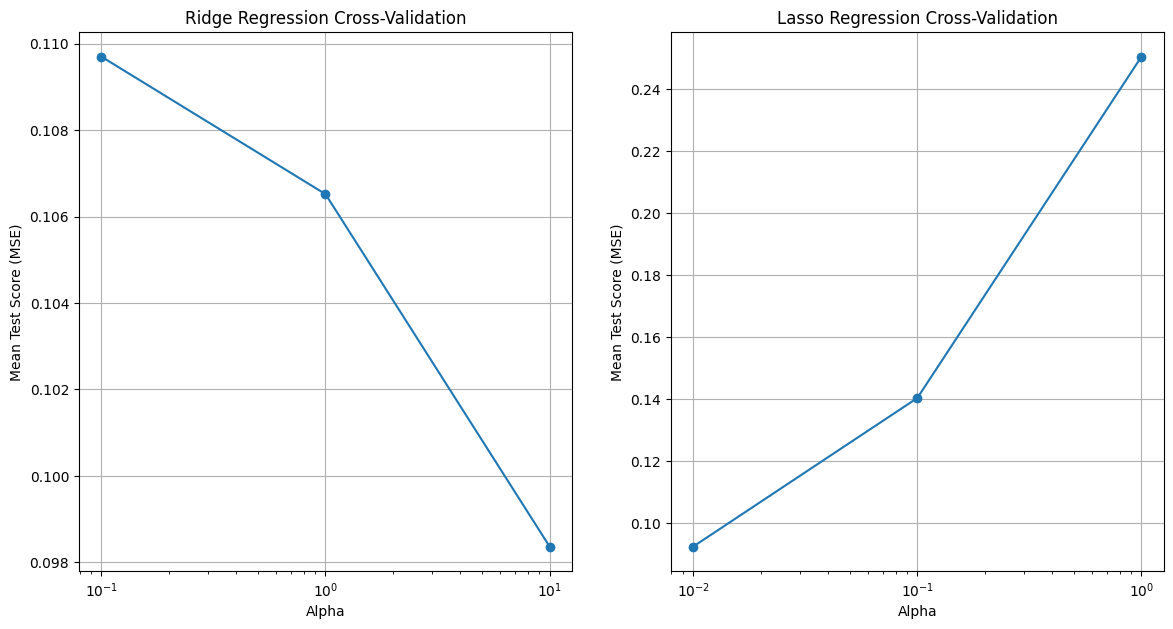

In [22]:
import matplotlib.pyplot as plt

# Extract the results for plotting
ridge_results = ridge_grid.cv_results_
lasso_results = lasso_grid.cv_results_

# Plotting Ridge Regression results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(ridge_params['alpha'], -ridge_results['mean_test_score'], marker='o')
plt.title('Ridge Regression Cross-Validation')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (MSE)')
plt.xscale('log')
plt.grid(True)

# Plotting Lasso Regression results
plt.subplot(1, 2, 2)
plt.plot(lasso_params['alpha'], -lasso_results['mean_test_score'], marker='o')
plt.title('Lasso Regression Cross-Validation')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (MSE)')
plt.xscale('log')
plt.grid(True)

plt.show()


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train on non-PCA data
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model on non-PCA data
print("Non-PCA Data Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Train on PCA data
rf_model.fit(X_PCA_train, y_PCA_train)
y_PCA_pred = rf_model.predict(X_PCA_test)

# Evaluate the model on PCA data
print("PCA Data Evaluation:")
print(classification_report(y_PCA_test, y_PCA_pred))
print("Accuracy:", accuracy_score(y_PCA_test, y_PCA_pred))

Non-PCA Data Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       262
           1       0.91      0.95      0.93       257

    accuracy                           0.93       519
   macro avg       0.93      0.93      0.93       519
weighted avg       0.93      0.93      0.93       519

Accuracy: 0.9325626204238922
PCA Data Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       262
           1       0.93      0.95      0.94       257

    accuracy                           0.94       519
   macro avg       0.94      0.94      0.94       519
weighted avg       0.94      0.94      0.94       519

Accuracy: 0.9383429672447013


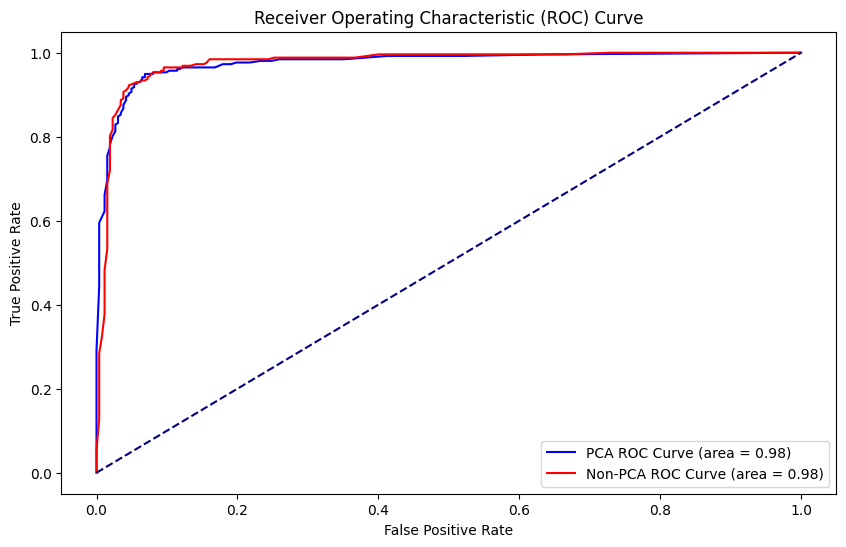

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# For PCA data
rf_model.fit(X_PCA_train, y_PCA_train)
y_PCA_scores = rf_model.predict_proba(X_PCA_test)[:, 1]  # Probabilities for the positive class

# For non-PCA data
rf_model.fit(X_train, y_train)
y_nonPCA_scores = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC for PCA
fpr_PCA, tpr_PCA, _ = roc_curve(y_PCA_test, y_PCA_scores)
auc_PCA = auc(fpr_PCA, tpr_PCA)

# Calculate ROC curve and AUC for non-PCA
fpr_nonPCA, tpr_nonPCA, _ = roc_curve(y_test, y_nonPCA_scores)
auc_nonPCA = auc(fpr_nonPCA, tpr_nonPCA)

# Plotting both ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_PCA, tpr_PCA, color='blue', label=f'PCA ROC Curve (area = {auc_PCA:.2f})')
plt.plot(fpr_nonPCA, tpr_nonPCA, color='red', label=f'Non-PCA ROC Curve (area = {auc_nonPCA:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# Prepare the Random Forest model
rf2_model = RandomForestClassifier(random_state=42)

# Setup for 10-fold cross-validation
cv_config = {
    'cv': 10,  # Number of folds
    'return_train_score': True,  # To capture training scores
    'scoring': ['accuracy', 'neg_log_loss']  # To capture accuracy and log loss (negated in sklearn)
}

# Cross-validate on PCA data
results_pca_rf = cross_validate(rf2_model, X_PCA_train, y_PCA_train, **cv_config)

# Cross-validate on non-PCA data
results_non_pca_rf = cross_validate(rf2_model, X_train, y_train, **cv_config)

# Print out results for Random Forest
print("Random Forest - PCA Data - Train Accuracy:", np.mean(results_pca_rf['train_accuracy']))
print("Random Forest - PCA Data - Test Accuracy:", np.mean(results_pca_rf['test_accuracy']))
print("Random Forest - PCA Data - Train Log Loss:", -np.mean(results_pca_rf['train_neg_log_loss']))  # negating to get positive log loss
print("Random Forest - PCA Data - Test Log Loss:", -np.mean(results_pca_rf['test_neg_log_loss']))  # negating to get positive log loss

print("Random Forest - Non-PCA Data - Train Accuracy:", np.mean(results_non_pca_rf['train_accuracy']))
print("Random Forest - Non-PCA Data - Test Accuracy:", np.mean(results_non_pca_rf['test_accuracy']))
print("Random Forest - Non-PCA Data - Train Log Loss:", -np.mean(results_non_pca_rf['train_neg_log_loss']))  # negating to get positive log loss
print("Random Forest - Non-PCA Data - Test Log Loss:", -np.mean(results_non_pca_rf['test_neg_log_loss']))  # negating to get positive log loss


Random Forest - PCA Data - Train Accuracy: 1.0
Random Forest - PCA Data - Test Accuracy: 0.9306259314456037
Random Forest - PCA Data - Train Log Loss: 0.04498568289315299
Random Forest - PCA Data - Test Log Loss: 0.2418129297998992
Random Forest - Non-PCA Data - Train Accuracy: 1.0
Random Forest - Non-PCA Data - Test Accuracy: 0.9306327055954476
Random Forest - Non-PCA Data - Train Log Loss: 0.05418560281828522
Random Forest - Non-PCA Data - Test Log Loss: 0.221949684303658


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                      n_iter=50, cv=10, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit the model
rf_random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Random Forest params:", rf_random_search.best_params_)
print("Best Random Forest CV score:", rf_random_search.best_score_)


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Random Forest params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Best Random Forest CV score: 0.9389039425552091


# KNN 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train on non-PCA data
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Evaluate the model on non-PCA data
print("Non-PCA Data Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Train on PCA data
knn_model.fit(X_PCA_train, y_PCA_train)
y_PCA_pred = knn_model.predict(X_PCA_test)

# Evaluate the model on PCA data
print("PCA Data Evaluation:")
print(classification_report(y_PCA_test, y_PCA_pred))
print("Accuracy:", accuracy_score(y_PCA_test, y_PCA_pred))

Non-PCA Data Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       262
           1       0.91      0.96      0.93       257

    accuracy                           0.93       519
   macro avg       0.93      0.93      0.93       519
weighted avg       0.93      0.93      0.93       519

Accuracy: 0.9325626204238922
PCA Data Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       262
           1       0.90      0.96      0.93       257

    accuracy                           0.93       519
   macro avg       0.93      0.93      0.93       519
weighted avg       0.93      0.93      0.93       519

Accuracy: 0.928709055876686


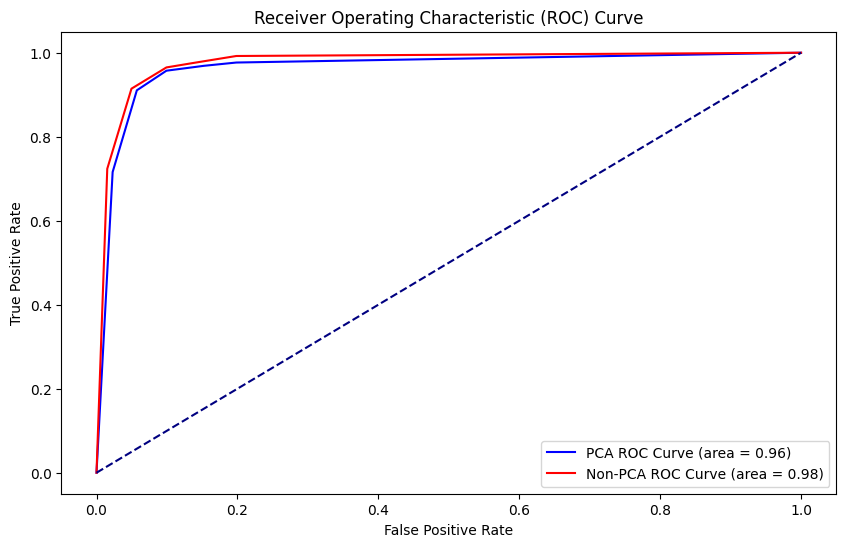

In [28]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train on PCA data
knn_model.fit(X_PCA_train, y_PCA_train)
y_PCA_scores = knn_model.predict_proba(X_PCA_test)[:, 1]  # Probabilities for the positive class

# Train on non-PCA data
knn_model.fit(X_train, y_train)
y_nonPCA_scores = knn_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC for PCA
fpr_PCA, tpr_PCA, _ = roc_curve(y_PCA_test, y_PCA_scores)
auc_PCA = auc(fpr_PCA, tpr_PCA)

# Calculate ROC curve and AUC for non-PCA
fpr_nonPCA, tpr_nonPCA, _ = roc_curve(y_test, y_nonPCA_scores)
auc_nonPCA = auc(fpr_nonPCA, tpr_nonPCA)

# Plotting both ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_PCA, tpr_PCA, color='blue', label=f'PCA ROC Curve (area = {auc_PCA:.2f})')
plt.plot(fpr_nonPCA, tpr_nonPCA, color='red', label=f'Non-PCA ROC Curve (area = {auc_nonPCA:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# Prepare the KNN model
knn_model = KNeighborsClassifier()

# Setup for 10-fold cross-validation
cv_config = {
    'cv': 10,  # Number of folds
    'return_train_score': True,  # To capture training scores
    'scoring': ['accuracy', 'neg_log_loss']  # To capture accuracy and log loss (negated in sklearn)
}

# Cross-validate on PCA data
results_pca_knn = cross_validate(knn_model, X_PCA_train, y_PCA_train, **cv_config)

# Cross-validate on non-PCA data
results_non_pca_knn = cross_validate(knn_model, X_train, y_train, **cv_config)

# Print out results for KNN
print("KNN - PCA Data - Train Accuracy:", np.mean(results_pca_knn['train_accuracy']))
print("KNN - PCA Data - Test Accuracy:", np.mean(results_pca_knn['test_accuracy']))
print("KNN - PCA Data - Train Log Loss:", -np.mean(results_pca_knn['train_neg_log_loss']))  # negating to get positive log loss
print("KNN - PCA Data - Test Log Loss:", -np.mean(results_pca_knn['test_neg_log_loss']))  # negating to get positive log loss

print("KNN - Non-PCA Data - Train Accuracy:", np.mean(results_non_pca_knn['train_accuracy']))
print("KNN - Non-PCA Data - Test Accuracy:", np.mean(results_non_pca_knn['test_accuracy']))
print("KNN - Non-PCA Data - Train Log Loss:", -np.mean(results_non_pca_knn['train_neg_log_loss']))  # negating to get positive log loss
print("KNN - Non-PCA Data - Test Log Loss:", -np.mean(results_non_pca_knn['test_neg_log_loss']))  # negating to get positive log loss


KNN - PCA Data - Train Accuracy: 0.9423804348741797
KNN - PCA Data - Test Accuracy: 0.9207288985232353
KNN - PCA Data - Train Log Loss: 0.12401496180425187
KNN - PCA Data - Test Log Loss: 0.7359984029852261
KNN - Non-PCA Data - Train Accuracy: 0.943572758443484
KNN - Non-PCA Data - Test Accuracy: 0.918242785530416
KNN - Non-PCA Data - Train Log Loss: 0.12616178504659603
KNN - Non-PCA Data - Test Log Loss: 0.7097109685071581


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
print("Best KNN params:", knn_grid_search.best_params_)
print("Best KNN CV score:", knn_grid_search.best_score_)

Best KNN params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN CV score: 0.9273336946213251
